<div class="alert alert-block alert-info" >
    <h1>Robot Perception</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <br>The server resource is limited to 2 core cpu and 1GB RAM at max per user. If you use more than that, the kernel may die. Nevertheless, you can bring it up again by restaring the kernel (Kernel -> Restart and clear output).<br>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Monday at 0:00.</b> (i.e. Sunday 23:59 + 1 min)</p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

<div class="alert alert-block alert-danger">
<p><b>Put your answer in the PROVIDED CELLS only!</b></p>
<b>Any new cell is not visible during the grading.</b>
<p>We provide additional code and markdown cells for each question, so that you do not have to add the new ones.</p>
<p>Do not copy the metadata from one cell to another, it is unique to that cell only.</p></div>

In [ ]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = ''
member2 = ''

## Q&As: Pose three questions (and ans.) to last lecture, 3 Q&As per member [1 point]

The format of the question and answer should be [Q1,A1,Q2,A2,Q3,A3,...,Qn,An], where Q1 is the question and A1 is the answer.<br>
If you work in a group, the total of the Q&As is $3xn$, where $n$ is the total number of members.<br>

Put your answer in the provided cell below!<br>
If you work in a group, you can extend the provided Q&A template, but please use the same format:
1. Q and A are separated by ONE $<$br$>$
2. Q&A and other Q&As are separated by TWO $<$br$>$

Or copy the provided format in the answer cell, and change the Q&A number.
<br>
Do not remove any markdown tag like $<$br$>$ in the answer cell.

YOUR ANSWER HERE
<br>
Q1 = What is a camera and what are the two types of camera?
<br>
A1 = A camera maps a 3D object space to a 2D image. It may contain number of camera models which are matrices with particular properties that represent the camera mapping. There are two main kinds of cameras — those with a finite center and those with a center at infinity. The main infinite camera is the affine camera.
<br>
<br>
Q2 = what are intrinsic and extrinsic parameters of camera?
<br>
A2 = 

**Intrinsic parameters**: The intrinsic parameters consists of the focal length, the optical center and the skew coefficient. 

**Extrinsic parameters**: The extrinsic parameters consist of a rotation component, $R$ and a translation component, $t$. The optical center of the camera is taken as the origin of the camera’s coordinate system while the x- and y-axis define the image plane.

The extrinsic parameters transform world points to camera coordinates while the intrinsic parameters map the camera coordinates into the image plane.
<br>
<br>
Q3 = What are the properties of general finite cameras?
<br>
A3 = 

Some properties of general finite cameras:
* Since R is orthogonal and K is necessarily invertible, the left (3x3) submatrix M of P must be non-singular.
* Any (3x4) matrix P with non-singular left-hand (3x3) submatrix M can be written in the form KR[Id -C ~ ] using the QR factorization.

* The set of finite projective cameras is identical to the set of (3x4) matrices with non-singular left (3x3) submatrices.

Where The matrix K is said to contain the intrinsic parameters of the camera. R and C are the extrinsic
parameters of the camera.

In [ ]:
'''
Put here the time required to solve the assignment per task as well as the sum.
Extend the list if needed.
'''

Task1 = 0
Task2 = 0
Sum = 0

# Task 1 : Build small method library for points in $\mathbb{R}^2$ and $\mathbb{P}^2$

Write a small "library" (or class) which supports the following methods:

- embed a point from $\mathbb{R}^2$ into $\mathbb{P}^2$
- normalize a point from $\mathbb{P}^2$
- check if a point $p$ is on a line $L$
- given two points $p_1,p_2$ generate the line $L$ between them
- given two lines $L_1,L_2$ generate the intersection point $p$ between them
- implement the cross product in form of a matrix multiplication $[...]_{x}$

Use as test case points which you find in file "ConstructLines.pdf"

In [207]:
import numpy as np

def embed_from_R2_to_P2(point):
    '''
    Function to embed a point from R2 into P2
    parameters:
        point: ndarray: A point in R2
    return:
        point: ndarray: A point in P2
    '''
    point_in_P2 = np.append(point,1)
    return np.reshape(point_in_P2,(len(point_in_P2),1))

def normalize_point(point):
    '''
    Function to normalize a given point in P2
    parameters:
        point: ndarray: A point in P2
    return:
        normalized point: ndarray: A normalized point in P2
    '''
    return point/point[-1]

def cross_product(element1,element2):
    '''
    Function to find cross product of two vectors in P2
    parameters:
        element1: ndarray: element1/vector1 in P2
        element2: ndarray: element2/vector2 in P2
    return:
        cross product: ndarray: cross product of element1 and element2 in P2
    '''
    return np.dot(span_skew_matrix(element1),element2)

def check_p_on_L(point,line):
    '''
    Function to check whether given point lies on line.
    parameters:
        point: ndarray: A point in P2
        line: ndarray: A line in P2
    return:
        bool: True or False for point on line
    '''
    if np.dot(point.T,line)==0:
        return True
    else:
        return False
    
def span_skew_matrix(vector):
    '''
    Function to generate skew symmetric matrix from a given vector in P2
    parameters:
        vector: ndarray: A vector in P2
    return:
        skew_matrix: ndarray: skew symmetric matrix for given vector.
    '''
    skew_matrix = [[0,-vector[2],vector[1]],[vector[2],0,-vector[0]],[-vector[1],vector[0],0]]
    return skew_matrix
def generate_line(point1,point2):
    '''
    Function to generate line from given points
    parameters:
        point1: ndarray: A point in P2
        point2:ndarray: A point in P2
    return:
        line: ndarray: A line in P2 formed by given two points
    '''
    return cross_product(point1,point2)

def generate_point(line1,line2):
    '''
    Function to find intersection of two lines
    parameters:
        line1: ndarray: A line in P2
        line2: ndarray: A line in P2
    return:
        point: ndarray: A point in P2 intersection ofgiven two lines
    '''
    return cross_product(line1,line2)

point_in_R2 = np.array([222,43])
point_in_P2 = embed_from_R2_to_P2(point_in_R2)
print("Point in R2: ",point_in_R2)
print("Point in P2: ",point_in_P2)


normalized_point_in_P2 = normalize_point(point_in_P2*3)
print("Normalized point in P2: ",normalized_point_in_P2)


p1 = np.array([-1,0,1])
p2 = np.array([0,-1,1])
cross_product_value = cross_product(p1,p2)
print("Cross product of ",p1," ",p2," is ",cross_product_value)

Point in R2:  [222  43]
Point in P2:  [[222]
 [ 43]
 [  1]]
Normalized point in P2:  [[222.]
 [ 43.]
 [  1.]]
Cross product of  [-1  0  1]   [ 0 -1  1]  is  [1 1 1]


YOUR ANSWER HERE

# Task 2 : H from matching line segments

Marking matching points in two images $Img_1$ and $Img_2$ ($Img_2$ is a "displaced" version of $Img_1$) is difficult, since placing a mark EXACTLY on a matching spot (i.e. hit the exact point) is in general difficult (just try it out and you'll see).

Thus a more stable method is: use matching LINE segemsnts instead (e.g. check the files ***"shelf???withLines.jpg"***). Now the question is: can we rephrase the basic DLT (which produces a homography $H$ from $Img_1$ to $Img_2$) in such a way that it uses line segements INSTEAD of matching points?

Answer: yes, we can.

![matching_line_segments](img/image1.png)

---


Hint (NB: all formulas from Task 1 are very helpful) ::

1. Let line $L_{j,i}$ ($j=1,2$ and $i=1,2,3,4$) be in image $Img_j$ ($j=1,2$), and let each $L_{j,i}$ be delimited by a start / end point pair $PS_{j,i}$ and $PE_{j,i}$ ($i=1,2,3,4$) in $I_j$.<br>
(note: these start / end points on $L_{1,*}$ in image  $I_1$ are ***NOT*** matching to the start/ end point pairs
delimiting $L_{2,*}$, ONLY the full lines $L_{1,i}$ as such are matching $L_{2,i}$)
2. Take the two start/end point pairs $PS_{1,i},PE_{1,i}\ and\  PS_{2,i},PE_{2,i}$ in homogenous form then build from the matching lines $L_{1,i}$ and $L_{2,i}$ (note: express all point as homogeneous points, express the needed cross product as matrix multiplication)
3. Use the fact that if some point $P_x$ lies on $L_1$ then $HP_x$ lies on $L_2$. This holds for all start and end points. Write $H$ as a 9 dimensional column vector $\left[ h_{11},h_{12},...,h_{32}, h_{33} \right]^T$ by reordering all equations w.r.t. to the unknow $h_{ij}$
4. For each start / end point pair you get two equations, which may be stacked. Four point pairs make a stack of 8 equations in 9 unknowns.
5. Python program the solution of these equations by the standard techniques presented in semester 1.
6. Test your implementation on my shelf images and the point lists provided in the respective csv files 

![shelf0](img/shelf0straightwithLines.jpg)
![shelf1](img/shelfrrstraightwithLines.jpg)

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
from copy import deepcopy

shelf0_with_line = pd.read_csv("shelf0straightwithLinesPoints.csv")
shelfrr_with_line = pd.read_csv("shelfrrstraightwithLinesPoints.csv")

points_img1_x = shelf0_with_line["x"].values
points_img1_y = shelf0_with_line["y"].values

def extract_points(dataframe):
    '''
    Function to extract x and y point from given dataframe
    parameters:
        dataframe: pandas dataframe: Dataframe consists of points from images.
    return:
        point_list: list: A list of all points from an image
    '''
    points_x = dataframe["x"].values
    points_y = dataframe["y"].values
    points_list = []
    for i,j in zip(points_x,points_y):
        points_list.append([i,j])
    return points_list

def get_points_in_P2(points):
    '''
    Function to embed all given points in R2 to P2
    parameters:
        points: ndarray: x,y points
    return:
        point_list: ndarray: A list of all points from an image
    '''
    return [embed_from_R2_to_P2(point) for point in points]

def get_lines(points):
    '''
    Function to generate lines for given point pairs in image
    parameters:
        points: ndarray: x,y points
    return:
        lines: list : A list of all points from an image
    '''
    lines = []
    for i in range(0,len(points),2):
        lines.append(generate_line(points[i],points[i+1]))
    return lines
def get_equation(point,line):
    '''
    Function to get equation for h matrix
    parameters:
        point: ndarray: A point in P2
        line: ndarray: A line in P2   
    return:
        temp_mat: ndarray: Equation [9X1]
    '''
    temp_mat = np.dot(line,point.T)
    return temp_mat.flatten()
def get_A_matrix(points,lines):
    '''
    Function to put A matrix together for given line and point pairs.
    parameters:
        points: ndarray: x,y points
        lines: list: all the possible lines
    return:
        A: list : A list of all points from an image
    '''
    A = []
    for idx,point in enumerate(points):
        A.append(get_equation(point,lines[idx//2]))
    return A
            
def get_homography_H(A):
    '''
    Function to calculate homography
    parameters:
        A: ndarray: A matrix in homogeneous equation
    return:
        h: ndarray: homography matrix
    '''
    # Ah = 0 ;Minimizing ||Ah|| such that ||h||=1
    # Solution by SVD
    U,s,Vt = np.linalg.svd(A)
    V=Vt.T
    h=V[:,-1] # Last column of V corresponding eigen vector to the smallest eigen value
    h=h/h[-1]
    h = np.reshape(h,(3,3))
    return h
def plot_projections(points_img1_P2,points_img2_P2, points_img1_projected, img_path):
    '''
    Function to plot the result
    parameters:
        points_img1_P2: ndarray: points from img1
        points_img2_P2: ndarray: points from img2
        points_img1_projected: ndarray: points from img1 projected onto img2
    return:
    
    '''
    plt.figure(figsize=(25,15))
    red_patch = mpatches.Patch(color='red', label='Points in img1')
    green_patch = mpatches.Patch(color='green', label='Points in img2')
    blue_patch = mpatches.Patch(color='blue', label='projected points from img1')
    plt.legend(handles=[red_patch, blue_patch,green_patch])
    img = cv2.imread(img_path)
    for i in points_img2_P2:
        cv2.circle(img, (int(i[0]),int(i[1])), 1, (0,255,0), 20) # GREEN
    for idx,i in enumerate(points_img1_P2):
        cv2.circle(img, (int(i[0]),int(i[1])), 1, (0,0,255), 20) # RED
        cv2.putText(img,str(idx+1),(int(i[0]),int(i[1])), cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4, cv2.LINE_AA )
    for idx,i in enumerate(points_img1_projected):
        cv2.circle(img, (int(i[0]),int(i[1])), 1, (255,0,0), 20) # RED
        cv2.putText(img,str(idx+1),(int(i[0]),int(i[1])), cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 4, cv2.LINE_AA )
    cv2.imwrite("img/output.png",img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

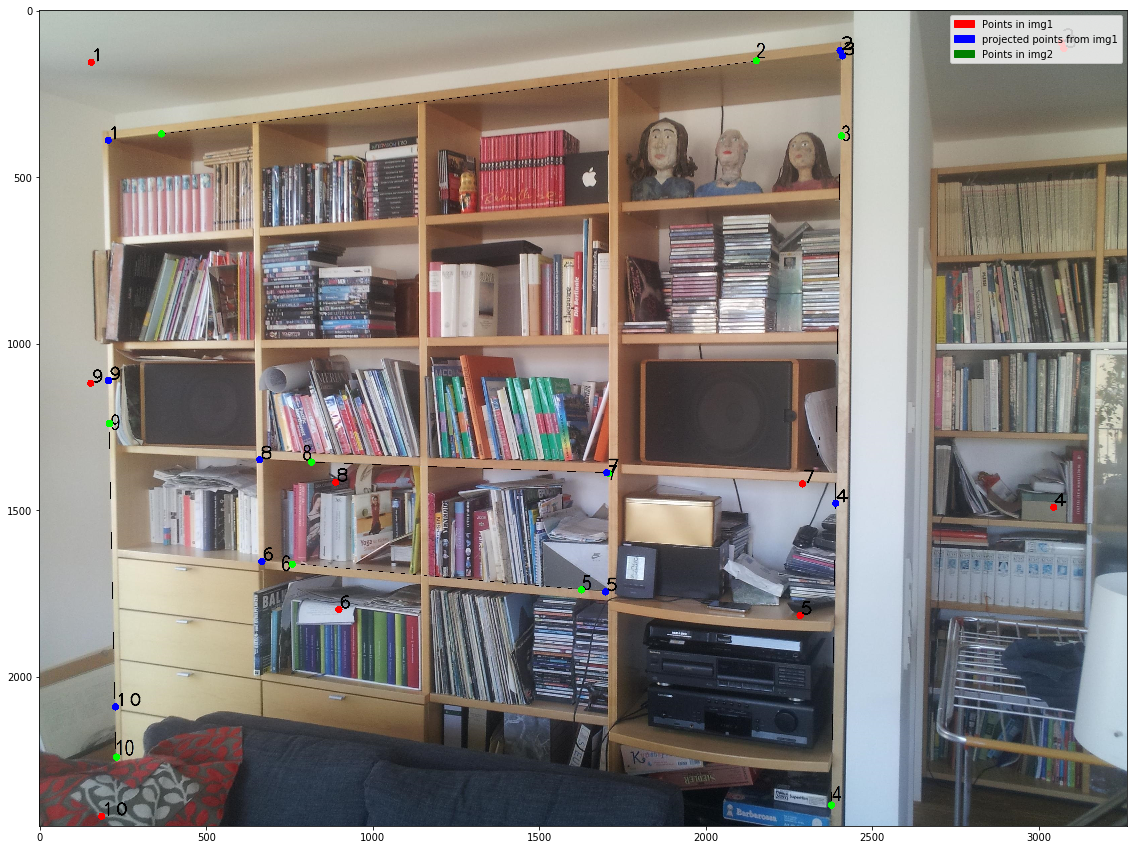

In [209]:
points_img1_R2 = extract_points(shelf0_with_line)
points_img2_R2 = extract_points(shelfrr_with_line)

points_img1_P2 = get_points_in_P2(points_img1_R2)
points_img2_P2 = get_points_in_P2(points_img2_R2)

lines_img2 = get_lines(points_img2_P2)
A = get_A_matrix(points_img1_P2,lines_img2)

h = get_homography_H(A)
points_img1_projected = [normalize_point(np.dot(h,i)) for i in points_img1_P2]


img2_path = "img/shelfrrstraightwithLines.jpg"
image_save_name = "output"
plot_projections(points_img1_P2,points_img2_P2, points_img1_projected, img2_path)


YOUR ANSWER HERE